Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


Saving ocrtestimg2 to ocrtestimg2


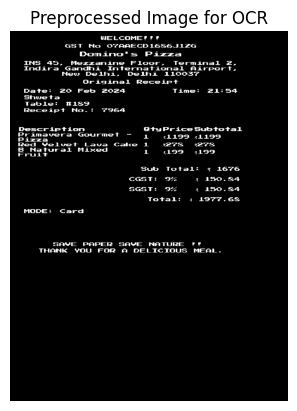

🔍 Extracted Text:
WELCOME
GST No O7AAECD16£6I12G
Domino's Pizza

INS 45. Mezzanine Floor, Terminal 2.
Indira Gandhi International Airport,
New Delhi, Delhi 110037

Original Receipt

 

Date: 20 Feb 2024 Time: 21:54
Shueta
Table: nis 9
Receipt MNo.: 7964
Description @tuPrice Subtotal
Primavera Gourmet —
pisses a 31199 71199
Red Velvet Lava Cake 1 37S 37S
B Natural Mixed 1 3199 w99

Sub Total: x 1676
CGST: 9% x 150.84
SGST: 92 z 150.s4

Total: » 1977.68

MODE: Card

SAVE PAPER SAVE NATURE FF
THANK YOU FOR A DELICIOUS MEAL.



In [1]:
# Install Tesseract
!sudo apt install tesseract-ocr -y
!pip install pytesseract Pillow
from google.colab import files
from PIL import Image
import io

# Upload image
uploaded = files.upload()

# Load image from uploaded file
image_path = list(uploaded.keys())[0]
image = Image.open(io.BytesIO(uploaded[image_path]))
image.show()
import pytesseract

# Run OCR
extracted_text = pytesseract.image_to_string(image)

import re

def clean_ocr_text(text):
    # Remove multiple spaces and newlines
    text = re.sub(r'\n+', '\n', text)                 # collapse multiple newlines
    text = re.sub(r'[ \t]+', ' ', text)               # collapse multiple spaces/tabs
    text = re.sub(r'\s+\n', '\n', text)               # remove trailing space before newline
    text = re.sub(r'\n\s+', '\n', text)               # remove leading space after newline
    text = re.sub(r'[^\x00-\x7F]+', '', text)         # remove non-ASCII characters
    text = text.strip()

    return text

# Clean the extracted text
cleaned_text = clean_ocr_text(extracted_text)

import cv2
import numpy as np

# Convert PIL image to OpenCV format
image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Convert to grayscale
gray = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)

# Apply thresholding (binarization)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Optional: dilation to make characters more distinct
kernel = np.ones((1, 1), np.uint8)
processed_image = cv2.dilate(thresh, kernel, iterations=1)

# Show processed image
from matplotlib import pyplot as plt
plt.imshow(processed_image, cmap='gray')
plt.title("Preprocessed Image for OCR")
plt.axis('off')
plt.show()

# Convert back to PIL for pytesseract
from PIL import Image
processed_pil = Image.fromarray(cv2.cvtColor(processed_image, cv2.COLOR_GRAY2RGB))

# OCR on the processed image
improved_text = pytesseract.image_to_string(processed_pil)

# Clean it again
cleaned_improved_text = clean_ocr_text(improved_text)

# Display OCR result
print("🔍 Extracted Text:")
print(extracted_text)